# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 16

**Author 1 (sciper):** Sven Norbert Becker (337372)  
**Author 2 (sciper):** Nicola Rachel Adele Ramdass (337214)   
**Author 3 (sciper):** Marc El Khoury (316117)  
**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

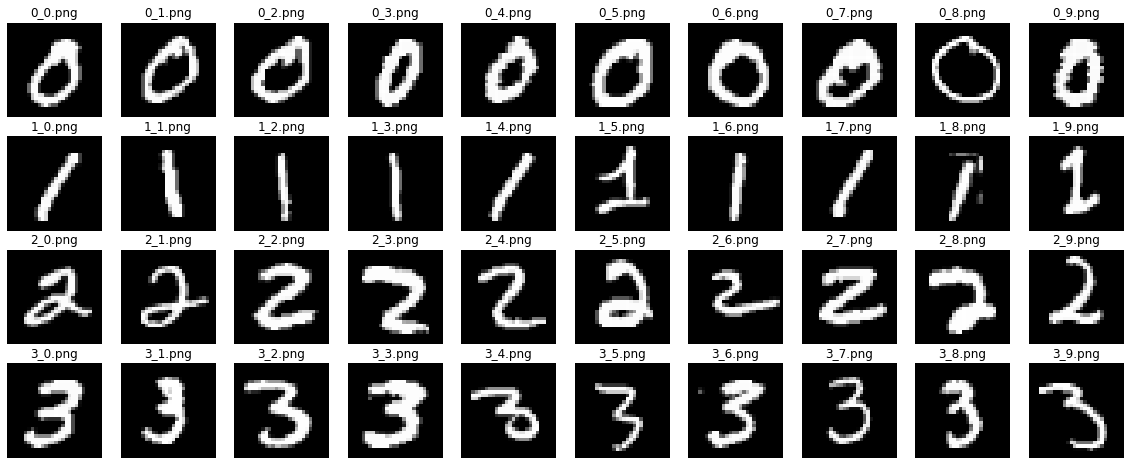

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

In [3]:
import cv2
import numpy as np
def preprocess ( img , only_canny:bool=False):
    img = img.copy()
    # Apply Canny-Edge detector
    temp = cv2.Canny(img,150,255)
    if only_canny: return temp
    # Remove artifacts
    im2 = temp.copy()
    mask = np.zeros((np.array(temp.shape)+2), np.uint8)
    # Identify closed regions by filling the image white 
    # - from top left pixel as this is for sure no closed region
    # - Closed Region is black (0)
    cv2.floodFill(temp, mask, (0,0), (255))
    # Make closed region bigger by 1 pixel (region now contains closed regions + 1-pixel border of them)
    temp = cv2.erode(temp, np.ones((3,3)))
    # Make enlarged region white
    temp = cv2.bitwise_not(temp)
    # Only keep the border-pixels
    temp = cv2.bitwise_and(temp,im2)
    # Sometimes, there are no closed regions; use only Canny then ...
    if np.all(temp == 0):
        print("Only using Canny as floodfill not working properly ...")
        temp = cv2.Canny(img,150,255)
    return temp

 


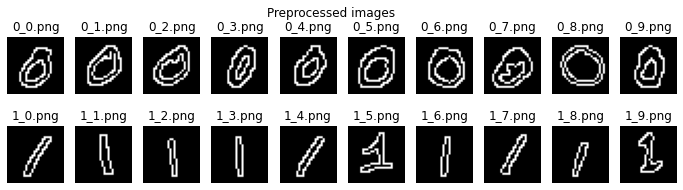

In [4]:
# TODO: Fill the lists below with your preprocessed images of "0"s and "1"s  
zeros = [preprocess(img) for img in zeros_im]
ones = [preprocess(img) for img in ones_im]

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

Canny edge detector was selected for primary edge detection because is performs better than naive approaches (e.g. Laplacian of Gaussian/Prewitt/Sobel + Thresholding). The main reasons justifying its deployment here are:
1. Uniqueness: the edge has a thickness of 1 pixel, i.e. there is no local abiguity
2. If the edge is bigger than 1 pixel due to a gradient, the pixel with highest gradient is chosen
3. Completeness: Detection of all edges in images

Since we need a 1-pixel thick boundary later on to sample points for the Fourier descriptors, this method is ideal. Through point 2., we are also not required to postprocess the output further. Although this filter is computationally more expensive than the naive methods, our tiny image size of 28x28 does not pose any challenge for Canny edge detection.

Furthermore, pictures carry rarely artifacts (e.g. the 9th one-image ones[8]). These are removed by finding the closed areas in the image and only keeping their border points. We use the fill-method as closed areas have the obvious characteristic that if the image is filled with one color, their area remains unchanged ('dry'). The seed point for this fill is (0,0) as there are no edges in this pixel.

### 1.2. Get descriptors (4 pts)

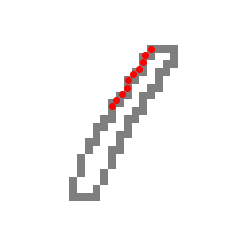

In [5]:
from scipy import interpolate
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

N = 50 # Random guess

def get_descriptors(img, N=N):
    # Extract contours (on which we will sample the descriptors)
    contours, _ = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE) 
    # We want biggest contour 
    contour = max(contours, key=lambda x: cv2.contourArea(x))
    x = [pt[0][0] for pt in contour]
    y = [pt[0][1] for pt in contour]
    # Close contour
    x.append(x[0])
    y.append(y[0])
    # Enforce equidistance (as points are sometimes diagonal [dist=1.41] and otherwise next [dist=1] to each other)
    distance = np.cumsum(np.sqrt( np.ediff1d(x, to_begin=0)**2 + np.ediff1d(y, to_begin=0)**2 ))
    f = interpolate.interp1d(distance, np.array([x,y]),kind="linear")
    # Sample linearly points on previously defined polygon-contour from start (0) to end (distance[-1])
    # (sample N+1 points but only keep the first N to 'close the loop' without duplications)
    xnew,ynew = f(np.linspace(0, distance[-1], N+1))
    xnew,ynew = xnew[:-1],ynew[:-1]
    descriptors = []
    for (re,im) in zip(xnew, ynew):
        descriptors.append(complex(re, im))
    return descriptors

# Check first 10 descriptors of a test image (just to check that your pipeline works well)
desc = np.array(get_descriptors(ones[0], N))[:10]
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.axis("off")
plt.scatter(desc.real, desc.imag, color="r")
plt.imshow(ones[0], alpha=0.5, cmap="binary")

#### Discussion

Only the outer parts of the "0"s should be taken as the inner parts are in some cases indistinguishable from "1"s. Taking always the same amount of samples on the surface is important for scaling and the definition of the discrete Fourier transform itself. If we had a fixed distance between the complex descriptors, we would obtain a different number of descriptors $N$ for shapes with smaller or bigger contour length. This would in turn change the meaning of the discrete frequencies of the DFT $Y_k$ of the descriptor-set $\{y[n]\}_{n=0}^{N-1}$ defined as  $$Y_k=\sum_{n=0}^{N-1} y[n]e^{-2\pi j\frac{nk}{N}}$$
as the frequency resolution is ~$\frac{1}{N}$. Individual Fourier descriptors at the same index $k$ would be not comparable anymore between pictures as they refer in general to different frequencies. The complex descriptors should be equidistant as discrete fourier theory in general assumes constant sampling frequency when transforming a continuous signal into discrete representation.

### 1.3. Study effect of descriptors (6 pts)

In [6]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros_im[0]
one = ones_im[0]

In [7]:
from scipy.fft import fft, fftfreq, ifft
# Stright-Forward pipeline: Descriptors -> FFT -> Apply filter (to keep only N first descriptors) -> FFT^-1
desc = get_descriptors(zero)
fourier = fft(desc)
freq = fftfreq(len(desc), 1)
freq_sort = np.sort(freq)
zero_desc_recovered = []
for n_keep in descr_set_sizes:
    # The frequency-vector has the format [f0,f1,f2,...,f(N/2-1),f-(N/2),...,f-2,f-1] such that forming the mask is straightforward
    mask = np.zeros(len(freq))
    mask[1:n_keep + 1] = 1
    mask[-n_keep:] = 1
    zero_desc_recovered.append(ifft(fourier * mask))
    
desc = get_descriptors(one)
fourier = fft(desc)
freq = fftfreq(len(desc), 1)
freq_sort = np.sort(freq)
one_desc_recovered = []
for n_keep in descr_set_sizes:
    # Same as above
    mask = np.zeros(len(freq))
    mask[1:n_keep + 1] = 1
    mask[-n_keep:] = 1
    one_desc_recovered.append(ifft(fourier * mask))




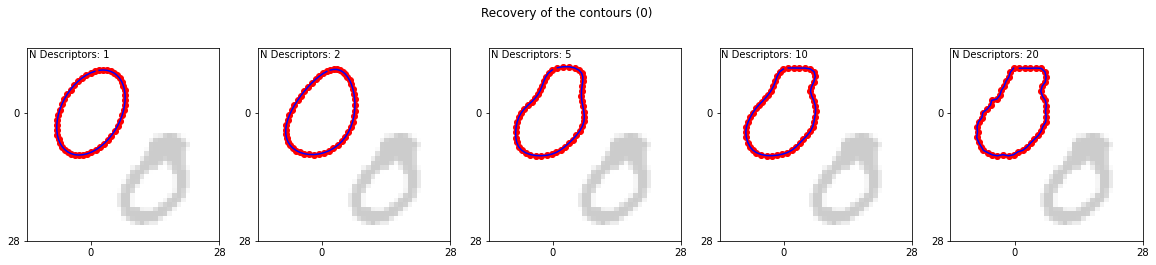

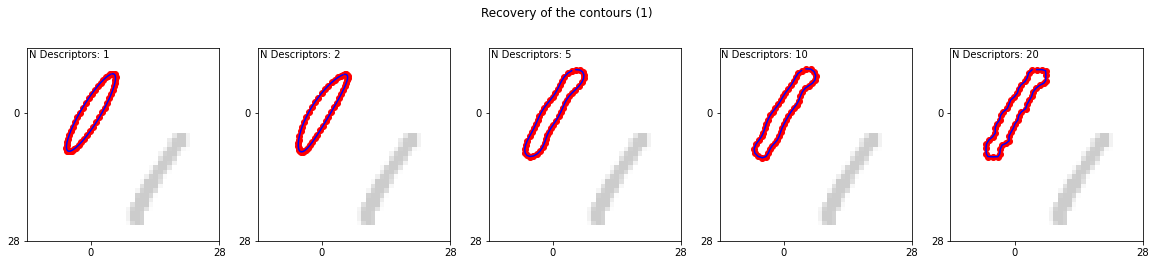

In [8]:
# On each of the 5 plots you will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot recovery for a zero image
for i in range(0,  5):
    # TODO

    axes[i].scatter(zero_desc_recovered[i].real, zero_desc_recovered[i].imag, color="r")
    axes[i].plot(zero_desc_recovered[i].real, zero_desc_recovered[i].imag, '-b')
    axes[i].set_aspect('equal')
    axes[i].set_xlim(-14,27)
    axes[i].set_ylim(-14,27)
    axes[i].invert_yaxis()
    axes[i].set_xticks([0,28])
    axes[i].set_yticks([0,28])
    axes[i].text(.01, .99, 'N Descriptors: {}'.format(descr_set_sizes[i]), ha='left', va='top', transform=axes[i].transAxes)
    axes[i].imshow(zero, alpha=0.2, cmap="binary")




fig.suptitle("Recovery of the contours (0)")
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
# Plot recovery for a one image
for i in range(0,  5):
     # TODO
    axes[i].scatter(one_desc_recovered[i].real, one_desc_recovered[i].imag, color="r")
    axes[i].plot(one_desc_recovered[i].real, one_desc_recovered[i].imag, '-b')
    axes[i].set_aspect('equal')
    axes[i].set_xlim(-14,27)
    axes[i].set_ylim(-14,27)
    axes[i].invert_yaxis()
    axes[i].set_xticks([0,28])
    axes[i].set_yticks([0,28])
    axes[i].text(.01, .99, 'N Descriptors: {}'.format(descr_set_sizes[i]), ha='left', va='top', transform=axes[i].transAxes)
    axes[i].imshow(one, alpha=0.2, cmap="binary")



    


fig.suptitle("Recovery of the contours (1)")
plt.show()

#### Discussion

The results match the expectations. It is clear that the reconstruction quality improves with the number of frequency components used. As we only take *positive* or *negative* frequencies but not the $f=0Hz$, the reconstruction is always centered at the origin whereas the original image's coordinates are $\in\{0,...,28\}\times \{0,...,28\}$. The $N=1$ case resembles in both cases an ellipse. This can be explained with Fourier analysis. With the reconstruction formula being in this case: $$x[n]=\frac{1}{N}\sum_{k=0}^{N-1} X_k e^{2\pi j \frac{kn}{N}}=\frac{1}{N}\left(X_1 e^{2\pi j \frac{n}{N}} + X_{-1} e^{2\pi j \frac{n}{N}} \right)$$
with $X_k$ the Fourier representation and $x[n]$ the reconstruction. With Euler's formula, one obtains a representation corresponding to the one of a tilted ellipse in complex space. 

Additionally, the reconstruction only improves marginally from $N=15$ to $N=24$ (mainly in describing the roughness of the drawing's countour better). This indicates that the magnitude of the Fourier transform is rather small and does not carry important information. On that note, $N=15$ already shows very fine structures of the input-image. For the classification task at hand, that many features can be considered harmful as we would 'overfit' to our contour. A smooth version of the border like the one for $N=10$ is probably a better representative for this class. It is inferred, that the lower frequency components $N\le10$ are probably better for the classification as they encode more the overall notion of the contour rather than unnecessary details like the fine-grained line-roughness on a pixel-level.

### 1.4 Clustering (2 pts)

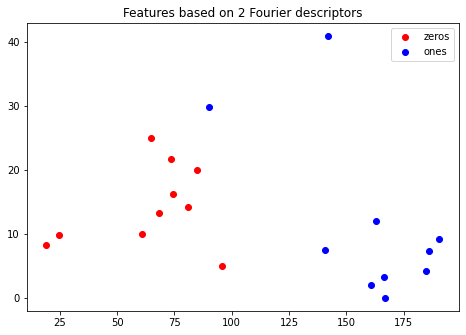

In [9]:
# TODO: You should fill the lists below, with your features

# First feature for all "0"s
zeros_f1 = []
# Second feature for all "0"s
zeros_f2 = []
# Fist feature for all "1"s
ones_f1 = []
# Second feature for all "1"s
ones_f2 = []

f1_idx = 1
f2_idx = 2

for zero in zeros:
    desc = get_descriptors(zero)
    zero_fourier = fft(desc)
    # Take absolute value as suggested in the lecture
    zeros_f1.append(np.abs(zero_fourier[f1_idx]))
    zeros_f2.append(np.abs(zero_fourier[f2_idx]))



for one in ones:
    desc = get_descriptors(one)
    one_fourier = fft(desc)
    # Take absolute value as suggested in the lecture
    ones_f1.append(np.abs(one_fourier[f1_idx]))
    ones_f2.append(np.abs(one_fourier[f2_idx]))



# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


We observed that the first 2 components are enough to map each image to a point in 2D space such that all points are linearly separable. This is because - as it can be seen in the plots of the previous exercise - those descriptors encode already the shape of the number quite well. Only one descriptor describing the extents of the contour with an ellipse would be good enough except for one outlier (project the above plot on the x-axis). This outlier is caused by the 6th "1" (ones[5]) where these extends resemble those of a "0" very much. As seen in the previous exercise, the second descriptor adds information about the actual shape of the body solving this issue as this specific "1" has quite a unique contour. Therefore, those descriptors were chosen.

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

- Translation: Since translation affects only the DC part of the signal (i.e. $f_0$), this part should be left-out to be invariant of translation. It contains no information about the object's contour shape anyway.
- Rotation: Rotation (around origin with angle $\theta$) acts as a phase-shift and is therefore mapped in the Fourier domain as a multiplication with $e^{-j\theta}$. Since this multiplication has modulus 1, taking the modulus of all descriptors makes them invariant to any rotation. Note: This also makes the decriptors invariant to the choice of the starting point in the contour.
- Scaling: Scaling the input image by $a\in\mathbb{C}$, the spectrum's magnitude is also scaled by $a$. Therefore, we could normalize the spectrum by deviding all used descriptors by the the modulus of one non-zero descriptor. The best results can be observed according to [1] when using the descriptor with the largest modulus.

- Combination: To make a the descriptors robust to *all* augmentations mentioned before, one should first get rid of the 0-frequency component, then apply the modulus to all descriptors, and finally divide the array by the largest descriptor.

[1] : See this [paper](https://lionel.kr.hsnr.de/~dalitz/data/publications/broken-fourier.pdf)

#### Implementation

In [10]:
# TODO: Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    desc = get_descriptors(img)
    fourier = fft(desc)
    
    freq = fftfreq(len(desc), 1)
    if inv_to_translation:
        # Set 0-frequency located at index 0 to 0
        fourier[0] = 0
    
    if inv_to_rotation:
        # Take (complex) norm of each Y_k
        fourier = np.abs(fourier)
    
    if inv_to_scale:
        # As suggested by paper
        fourier /= np.max(np.abs(fourier[1:]))
    # Only return descriptors that correspond to positive frequencies
    return fourier[np.where(np.abs(freq) > -1e-9)]
        

In [11]:
# Define custom rotation function. You may add other parameters to the function.

from skimage.transform import resize

def random_rotate(img):
    img = img.copy()
    return (255.0 * skimage.transform.rotate(img, np.random.randint(0,360), resize=False)).astype(np.uint8)
    # Avoid discretization errors by constraining to [0,90,180,270] degrees by replacing above line with:
    # return (255.0 * skimage.transform.rotate(img, np.random.randint(0,4) * 90, resize=False)).astype(np.uint8)

    

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img):
    """Translate such that entire digit is still completely in picture"""
    img = img.copy()
    # Find out how max image can be maximally translated in each axis such that it still remains in scene
    max_borders = np.max(np.where(img > 0), axis=1)
    min_borders = np.min(np.where(img > 0), axis=1)
    # Randomly translate within these limits
    x_shift = np.random.randint(- min_borders[1] + 1, 27 - max_borders[1])
    y_shift = np.random.randint(- min_borders[0] + 1, 27 - max_borders[0])

    # Perform the shift
    img_translated = np.roll(img, x_shift, axis=1)
    img_translated = np.roll(img_translated, y_shift, axis=0)

    # Clear out repetition
    if x_shift > 0:
        img_translated[:,:x_shift] = 0
    elif x_shift < 0:
        img_translated[:,x_shift:] = 0

    if y_shift > 0:
        img_translated[:y_shift,:] = 0
    elif y_shift < 0:
        img_translated[y_shift:, :] = 0



    return img_translated

# Minimum scale value (as images are just 28x28, too small scaling transforms them into something indistinguishable even for humans)
LOW_SCALE = 0.7

# Define custom rotation function. You may add other parameters to the function.
def random_scale(img):
    original_shape = img.shape
    # Find out how max image can be maximally scaled in each axis such that it still remains in scene
    max_borders = np.max(np.where(img > 0), axis=1)
    min_borders = np.min(np.where(img > 0), axis=1)
    max_scale = np.min([
        original_shape[1] / 2 / (max_borders[1] - 1 - original_shape[1] / 2),
        original_shape[1] / 2 / (original_shape[1] / 2 - min_borders[1] + 1),
        original_shape[0] / 2 / (max_borders[0] - 1 - original_shape[0] / 2),
        original_shape[0] / 2 / (original_shape[0] / 2 - min_borders[0] + 1),
    ])
    # Additional safety margin
    max_scale *= 0.7

    # Select randomly an actual scale
    scale = np.random.random_sample() * (max_scale - LOW_SCALE) + LOW_SCALE
    # Perform the scaling
    img_resized = resize(img, (scale * np.array(original_shape)).astype(np.uint8))
    img_result = np.zeros(original_shape)
    if scale <= 1.0:
        img_result[
            original_shape[0] // 2 - img_resized.shape[0] // 2 : original_shape[0] // 2 + img_resized.shape[0] // 2 + np.mod(img_resized.shape[0], 2),
            original_shape[1] // 2 - img_resized.shape[1] // 2 : original_shape[1] // 2 + img_resized.shape[1] // 2 + np.mod(img_resized.shape[1], 2),
        ] = img_resized
    else:
        img_result = img_resized[
            img_resized.shape[0] // 2 - original_shape[0] // 2 : img_resized.shape[0] // 2 + original_shape[0] // 2 + np.mod(original_shape[0], 2),
            img_resized.shape[1] // 2 - original_shape[1] // 2 : img_resized.shape[1] // 2 +original_shape[1] // 2 + np.mod(original_shape[1], 2),
        ]
    result = (255 * img_result).astype(np.uint8)
    if np.any(result > 0): return result
    else: return random_scale(img)

In [12]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = [random_rotate(preprocess(img)) for img in zeros_im]
rotated_images_ones = [random_rotate(preprocess(img)) for img in ones_im]

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = [random_translate(preprocess(img)) for img in zeros_im]
translated_images_ones = [random_translate(preprocess(img)) for img in ones_im]

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = [random_scale(preprocess(img)) for img in zeros_im]
scaled_images_ones = [random_scale(preprocess(img)) for img in ones_im]

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros =  [random_translate(random_scale(random_rotate(preprocess(img)))) for img in zeros_im]
transformed_images_ones =   [random_translate(random_scale(random_rotate(preprocess(img)))) for img in ones_im]

<ipython-input-11-035e13240c58>:53: RuntimeWarning: divide by zero encountered in double_scalars
  original_shape[1] / 2 / (max_borders[1] - 1 - original_shape[1] / 2),


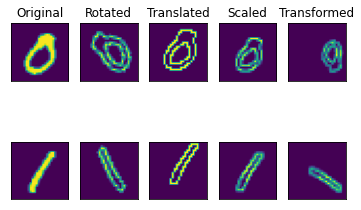

In [13]:
# Exeplary plots
import itertools
idx = 0
fig, axs = plt.subplots(2,5)
axs[0,0].imshow(zeros_im[idx])
axs[0,0].set_title("Original")
axs[0,1].imshow(rotated_images_zeros[idx])
axs[0,1].set_title("Rotated")
axs[0,2].imshow(translated_images_zeros[idx])
axs[0,2].set_title("Translated")
axs[0,3].imshow(scaled_images_zeros[idx])
axs[0,3].set_title("Scaled")
axs[0,4].imshow(transformed_images_zeros[idx])
axs[0,4].set_title("Transformed")
axs[1,0].imshow(ones_im[idx])
axs[1,1].imshow(rotated_images_ones[idx])
axs[1,2].imshow(translated_images_ones[idx])
axs[1,3].imshow(scaled_images_ones[idx])
axs[1,4].imshow(transformed_images_ones[idx])
for i,j in itertools.product(range(2), range(5)): 
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])


    


**********


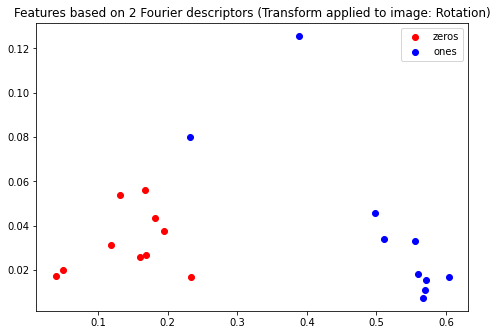

**********


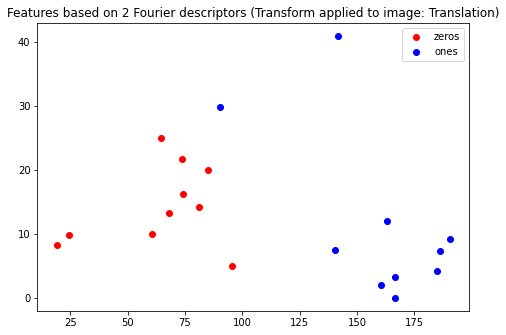

**********


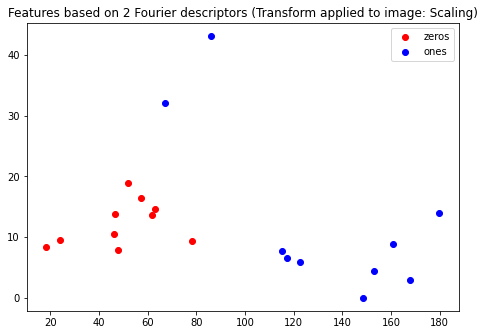

**********


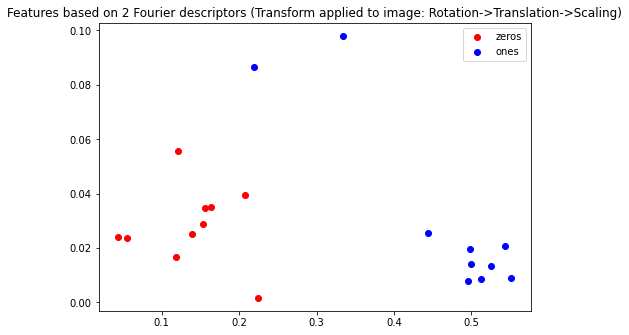

In [14]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!

transforms = [
    # ["GT", [zeros, ones], [1,2], [True, False, False]],
    ["Rotation", [rotated_images_zeros, rotated_images_ones], [1,2], [False, False, True]],
    ["Translation", [translated_images_zeros, translated_images_ones], [1,2], [False, True, False]],
    ["Scaling", [scaled_images_zeros, scaled_images_ones], [1,2], [True, False, False, ]],
    ["Rotation->Translation->Scaling", [transformed_images_zeros, transformed_images_ones], [1,2], [True, True, True]],

]

for transform in transforms:
    # First feature for all "0"s
    zeros_f1 = []
    # Second feature for all "0"s
    zeros_f2 = []
    # Fist feature for all "1"s
    ones_f1 = []
    # Second feature for all "1"s
    ones_f2 = []

    f1_idx = 1
    f2_idx = 2
    for zero in transform[1][0]:
        desc = get_invariant_features(zero, *transform[3])
        zeros_f1.append(np.abs(desc[transform[2][0]]))
        zeros_f2.append(np.abs(desc[transform[2][1]]))

    for one in transform[1][1]:
        desc = get_invariant_features(one, *transform[3])
        ones_f1.append(np.abs(desc[transform[2][0]]))
        ones_f2.append(np.abs(desc[transform[2][1]]))
    print("*" * 10)
    # Plot features for all images
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
    ax.scatter(ones_f1, ones_f2, color='b', label='ones')
    ax.legend(loc='best')
    plt.title("Features based on 2 Fourier descriptors (Transform applied to image: {})".format(transform[0]))
    plt.show()


#### Discussion

We still obtain 2 linearly separable clusters which indicates that the invariance-protocol works. We note that all the plots were generated by processing the data differently. This is why the datapoints are distributed differently in each plot although the underlaying shapes are always the same. Nevertheless, the distributions are in general of similar shape (i.e. "0"s mainly at bottom left and "1"s at top and on the right) suggesting a well-working set of algorithms.

However, it must be noted that our method works well if the input is completely in the image but fails if parts of the contour are outside. This is by design as we require the Canny-detected border of the image to be a closed contour, otherwise we would fit the contour from the "inside" on the digits' borders as well. Deep Learning approaches do not suffer from this and yield in general much better results while being less error-prone. Therefore, we recommend those over this approach.

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...


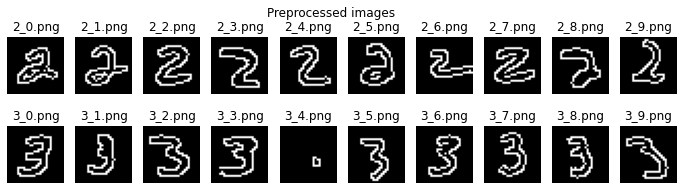

In [15]:
# TODO
from shapely.geometry import Polygon
def preprocess_2(img, only_canny=False):
    img = img.copy()

    # Apply Gaussian blur filter
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply Canny-Edge detector
    temp = cv2.Canny(img, 100, 200)

    if only_canny:
        return temp

    # Remove artifacts
    im2 = temp.copy()
    mask = np.zeros((np.array(temp.shape) + 2), np.uint8)

    # Identify closed regions by filling the image white
    # - from top left pixel as this is for sure no closed region
    # - Closed Region is black (0)
    cv2.floodFill(temp, mask, (0, 0), (255),8)

    # Make closed region bigger by 1 pixel (region now contains closed regions + 1-pixel border of them)
    temp = cv2.erode(temp, np.ones((3, 3)))

    # Make enlarged region white
    temp = cv2.bitwise_not(temp)

    # Only keep the border-pixels
    temp = cv2.bitwise_and(temp, im2)

    # Sometimes, there are no closed regions; use only Canny then ...
    if np.all(temp == 0):
        print("Only using Canny as floodfill not working properly ...")
        temp = cv2.Canny(img, 150, 255)

    return temp


 

twos = [preprocess_2(img) for img in twos_im]
threes = [preprocess_2(img) for img in threes_im]

# Plot images
fig, axes = plt.subplots(2, len(twos), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

N = 50 # Random guess

def get_perimeter_area(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=lambda x: cv2.contourArea(x))

    # Approximate contour with polygon
    epsilon = 0.0000001 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Draw polygon on image
    img_with_poly = np.zeros_like(img)
    cv2.drawContours(img_with_poly, [approx], 0, 255, 1)

    # Calculate perimeter
    perimeter = cv2.arcLength(approx, True)

    # Calculate area
    area = cv2.contourArea(approx)

    # Calculate compactness
    compactness = (perimeter ** 2) / area

    return perimeter, area, compactness, img_with_poly




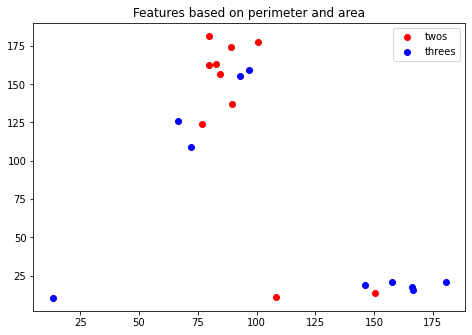

In [16]:
## TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = []
twos_f2 = []
threes_f1 = []
threes_f2 = []

for two in twos:
    two_perimeter, two_area, two_compactness, img_with_poly_2 = get_perimeter_area(two)
    twos_f1.append(two_perimeter)
    twos_f2.append(two_area)



for three in threes:
    three_perimeter, three_area, three_compactness, img_with_poly_3 = get_perimeter_area(three)
    threes_f1.append(three_perimeter)
    threes_f2.append(three_area)


# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

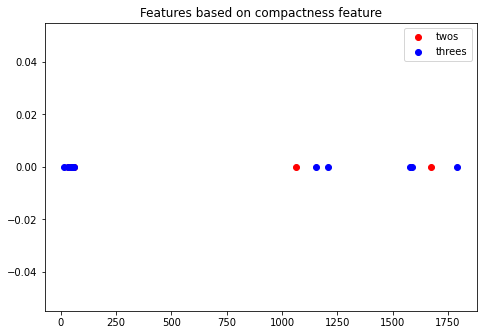

In [24]:
# TODO: Make the 1D plot of the compacity
twos_f1 = []
twos_f2 = []
threes_f1 = []
threes_f2 = []

for two in twos:
    two_perimeter, two_area, two_compactness,z = get_perimeter_area(two)
    twos_f1.append(two_compactness)
    twos_f2.append(0)

for three in threes:
    three_perimeter, three_area, three_compactness,y = get_perimeter_area(three)
    threes_f1.append(three_compactness)
    threes_f2.append(0)

# Plot 1D plot for compactness feature
# Plot features for all images

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on compactness feature")
plt.show()



#  Discussion

If we take a look at the first graph(the 2D), we can see that most of the twos points are clustered around the upper middle area of the plot. On the other hand we can see that most of the threes are clustered around the lower right part of the plot (we have exceptions in the cluster - points that shouldn't be here). This should be due to the different drawn shapes. If we would continue with more data we could observe big clusters that we could separate using different methods such as k-means or hierarchical clustering  

For the values of compactness, if we take a look at the data dispositon on the graph we can see that most of the threes have bigger scores than the twos. This measure is used, with a more circular shape will have a higher compactness value and a more irregular shape will have a lower compactness value. So we can see that here with a bigger data set we could maybe find different clusters for the twos and threes.

### 2.2. Additional method (4 pts)

In [18]:
# TODO
twos = [preprocess_2(img) for img in twos_im]
threes = [preprocess_2(img) for img in threes_im]

N = 50 # Random guess

def get_circumrect_area(img, k):
    # Rotate the image by the negative angle of rotation
    cols, rows = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), -k, 1)
    rotated = cv2.warpAffine(img, M, (cols,rows))
    
    # Get the rotated bounding box of the object
    rect = cv2.minAreaRect(np.transpose(np.where(rotated > 0)))
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    # Extract the dimensions of the rotated bounding box
    width = rect[1][0]
    height = rect[1][1]
    
    # Calculate the area of the circumscript rectangle
    area_rect = width * height
    
    return area_rect

def get_rectangularity(img, N=N):
    
    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    #First we find the area of the figure we have
    contours, _ = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    contour = max(contours, key=lambda x: cv2.contourArea(x))
    x = [pt[0][0] for pt in contour]
    y = [pt[0][1] for pt in contour]
    
    #Construct the polygon
    polygon = Polygon(np.array([x,y]).T)
    #Get the perimeter
    perimeter = polygon.length
    #Get the area
    area = polygon.area
    
    #Now we call the function we defined up.
    rectangularity = []
    
    for k in range(-900, 901, 1):
        k /= 100.0
        #Now we need to find the max value
        rectangularity.append(area/get_circumrect_area(img, k))
        
    max_val_rect=np.max(rectangularity)
    
    return max_val_rect

Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...


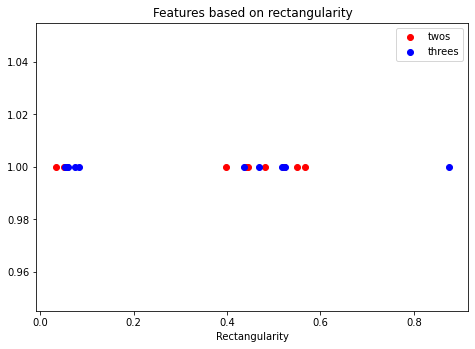

In [19]:
# TODO
# We chose to work with rectangularity (ratio between the the surface of the object and that of the
# circumscript rectangle)

twos_f1 = []
twos_f2 = []
threes_f1 = []
threes_f2 = []

for two in twos:
    two_rectangularity = get_rectangularity(two)
    twos_f1.append(two_rectangularity)
    twos_f2.append(1)

for three in threes:
    three_rectangularity = get_rectangularity(three)
    threes_f1.append(three_rectangularity)
    threes_f2.append(1)

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.xlabel("Rectangularity")
plt.title("Features based on rectangularity")
plt.show()

#### Discussion

### Rectangularity

For the rectangularity, we can see that we can't have different clusters. The positions of the clusters are close to each other. This method is not suited for these digits and we should try another method.

We want to try another method which is symmetry because we can clearly observe that the threes should have a horizontal axis of symmetry and the twos don't. Let's see if we can get a clear clustering...

In [20]:
# TODO
twos = [preprocess_2(img) for img in twos_im]
threes = [preprocess_2(img) for img in threes_im]

def get_symmetry(img):
    # Center the image
    M = cv2.moments(img)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cols, rows = img.shape
    shiftx = int(cols/2 - cx)
    shifty = int(rows/2 - cy)
    M = np.float32([[1, 0, shiftx], [0, 1, shifty]])
    img = cv2.warpAffine(img, M, (cols, rows))
    
    # Calculate symmetry score
    flipped = cv2.flip(img, 0)
    diff = cv2.absdiff(img, flipped)
    score = cv2.sumElems(diff)[0] / (img.shape[0] * img.shape[1])
    
    return score


Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...
Only using Canny as floodfill not working properly ...


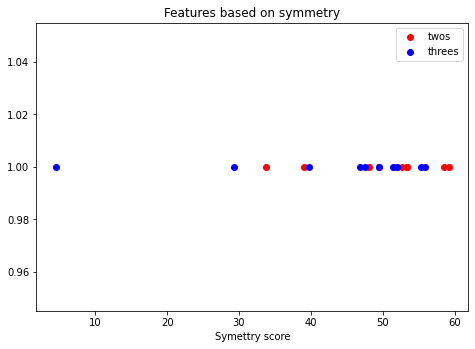

In [21]:
twos_f1 = []
twos_f2 = []
threes_f1 = []
threes_f2 = []
for two in twos:
    two_symmetry = get_symmetry(two)
    twos_f1.append(two_symmetry)
    twos_f2.append(1)

for three in threes:
    three_symmetry = get_symmetry(three)
    threes_f1.append(three_symmetry)
    threes_f2.append(1)


# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.xlabel("Symettry score")
plt.title("Features based on symmetry")
plt.show()




### Symmetry

The function 'get_symmetry' calculates the symmetry score of the image by flipping the image vertically using cv2.flip, taking the absolute difference between the original and flipped image using cv2.absdiff, and then summing the pixel intensity differences using cv2.sumElems. Finally, the function divides the sum of pixel intensity differences by the total number of pixels in the image to get the symmetry score

We then calculate the moments of the image using cv2.moments(). We calculate the centroid of the image using cx = int(M['m10'] / M['m00']) and cy = int(M['m01'] / M['m00']). We then compute the amount by which we need to shift the image so that its centroid is at the center of the image, and use cv2.warpAffine() to shift the image. After centering the image, we can calculate the symmetry score as before.

Now, with the data we have we're not having clear clustering with the symmetry score but it should work with a bigger data set. With this data set,we can already see that we can see many clusters for the twos and the threes. We should have in mind that the initial shapes seem to be hand-drawn and not as symetrical as they should be and may be rotated a bit. That's why in our results we can see a different symettry score and not clear clustering.

In [22]:
moments_twos = np.zeros((10, 2))

for i in range(len(twos)):
    img = twos[i]
    contours, _ = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    contour = max(contours, key=lambda x: cv2.contourArea(x))
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    moments_twos[i,0] = cx
    moments_twos[i,1] = cy


moments_threes = np.zeros((10, 2))

for i in range(len(threes)):
    img = threes[i]
    contours, _ = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    contour = max(contours, key=lambda x: cv2.contourArea(x))
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    moments_threes[i,0] = cx
    moments_threes[i,1] = cy
    

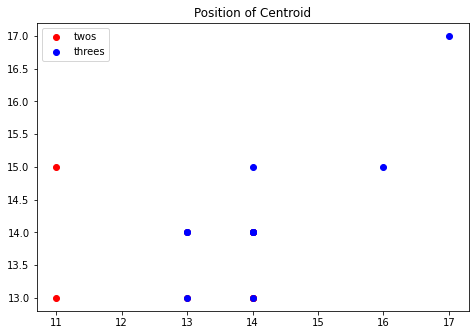

In [23]:
# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(moments_twos[:,0], moments_twos[:,1], color='r', label='twos')
ax.scatter(moments_threes[:,0], moments_threes[:,1], color='b', label='threes')
ax.legend(loc='best')
plt.title("Position of Centroid")
plt.show()

#### Moments/Center of Gravity

Another region based descriptor is the moments of the image. The moments are used to describe the mass repartition of the body in the image. Using this, we can find the position of the center of gravity of the 2s and the 3s. Intuitively, by looking at the images of the contours, it can be assumed that for both numbers, the center of gravity is in about the center of the shape. As shown in the graph above, this is confirmed as there is again no clear clustering.